# Algoritmo K-Means

Tomando como dataset de prueba el dataset IRIS, se implementa el algoritmo K-Means desde cero en R.

En R, para cargar una librería se utiliza la función `library()`. En este caso, se carga la librería `MASS`, que contiene funciones y datasets útiles para análisis estadísticos.
Por otro lado, necesitamos cargar también la librería `stats`, que es una librería base de R, proporcionando funciones estadísticas esenciales y algoritmos, incluyendo el algoritmo K-Means.

In [1]:
library(MASS) # Carga el paquete MASS para conjuntos de datos adicionales
data("iris")  # Carga el conjunto de datos iris
set.seed(123) # Fija la semilla para reproducibilidad
library(stats) # Carga el paquete stats para funciones estadísticas, que es el que contiene el algoritmo K-means
# Modelo K-means con K=3
kmeans_model <- kmeans(iris[, -5], centers = 3, nstart = 20) # Ajuste del modelo, con 20 inicializaciones aleatorias y sin la columna de especies
kmeans_model # Muestra los resultados del modelo K-means, incluyendo los centroides, la asignación de clusters y la suma de cuadrados dentro de los clusters (WCSS)

K-means clustering with 3 clusters of sizes 50, 62, 38

Cluster means:
  Sepal.Length Sepal.Width Petal.Length Petal.Width
1     5.006000    3.428000     1.462000    0.246000
2     5.901613    2.748387     4.393548    1.433871
3     6.850000    3.073684     5.742105    2.071053

Clustering vector:
  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2
 [92] 2 2 2 2 2 2 2 2 2 3 2 3 3 3 3 2 3 3 3 3 3 3 2 2 3 3 3 3 2 3 2 3 2 3 3 2 2 3 3 3 3 3 2 3 3 3 3 2 3 3 3 2 3 3 3 2 3 3 2

Within cluster sum of squares by cluster:
[1] 15.15100 39.82097 23.87947
 (between_SS / total_SS =  88.4 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss" "betweenss"    "size"         "iter"         "ifault"      

Podemos observar como, en la última relación de información que nos proporciona 'kmeans_model', la lista de componentes disponibles contiene "cluster", 
que indica a qué cluster pertenece cada observación del conjunto de datos original y "centers", que muestra las coordenadas de los centroides de cada cluster.

In [2]:
tabla <- table(iris$Species, kmeans_model$cluster)
tabla

            
              1  2  3
  setosa     50  0  0
  versicolor  0 48  2
  virginica   0 14 36

Cálculo del porcentaje de clasificaciones correctas

In [3]:
100 * sum(diag(tabla)) / sum(tabla)

[1] 89.33333

In [4]:
# Cargar librería ggplot2
library(ggplot2)    

NOTA:   
  Se transforma la información a **factor** para que *ggplot2* pueda interpretarla correctamente. Si no se hace esta transformación, 
ggplot2 podría tratar los clusters como variables numéricas continuas en lugar de considerarlas como discretas. De esta forma, se asegura que cada cluster se represente con un color distinto en el gráfico.

Configuración básica del gráfico:   
  - Se utiliza `ggplot()` para iniciar el gráfico.   
- `aes()` define las estéticas del gráfico, mapeando las variables a los ejes x e y, y asignando colores según los clusters obtenidos del modelo K-means.   
- `geom_point()` añade los puntos al gráfico, con un tamaño de 3 para una mejor visualización.   
- `labs()` añade títulos y etiquetas a los ejes.   
- `theme_minimal()` aplica un tema minimalista al gráfico para una apariencia más limpia.

```R
ggplot(iris, aes(x = Sepal.Length, y = Sepal.Width, color = as.factor(kmeans_model$cluster))) +
  geom_point(size = 3) +
  labs(title = "K-means Clustering de Iris",
       x = "Longitud del Sépalo",
       y = "Anchura del Sépalo",
       color = "Cluster") +
  theme_minimal()
```

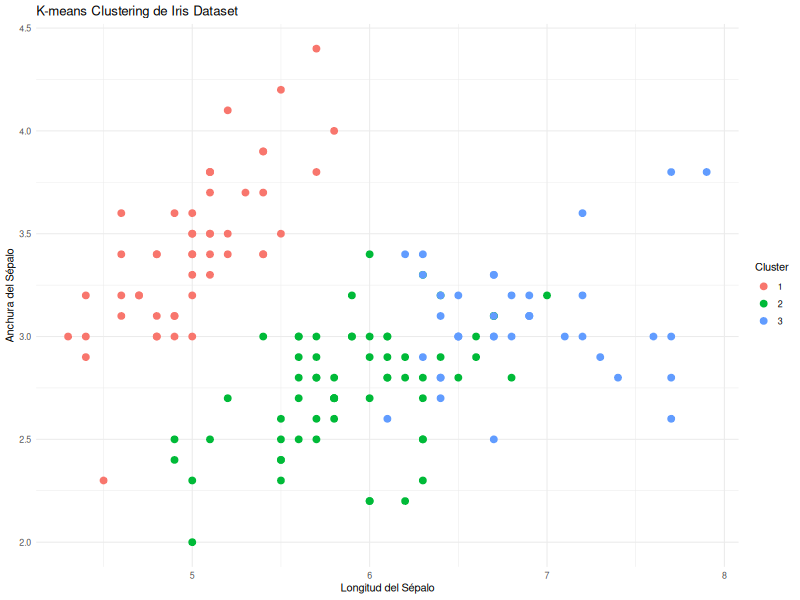

In [5]:
# Mostramos en la gráfica los clusters obtenidos
iris_clustered <- iris # Creamos una copia del conjunto de datos iris
iris_clustered$Cluster <- as.factor(kmeans_model$cluster) # Añadimos una columna con la asignación de clusters, obtenida del modelo K-means y convirtiendo a factor
ggplot(iris_clustered, aes(x = Sepal.Length, y = Sepal.Width, color = Cluster)) +
  geom_point(size = 3) +
  labs(title = "K-means Clustering de Iris Dataset",
       x = "Longitud del Sépalo",
       y = "Anchura del Sépalo") +
  theme_minimal()

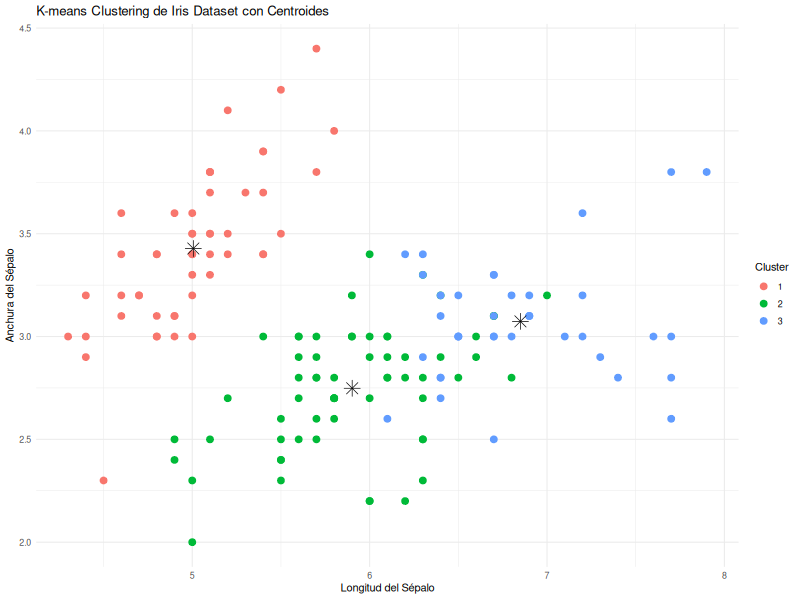

In [6]:
# Mostramos en la gráfica los centroides obtenidos
centroids <- as.data.frame(kmeans_model$centers) # Convertimos los centroides a un data frame
centroids$Cluster <- as.factor(1:nrow(centroids)) # Añadimos una columna de cluster para los centroides y convertimos a factor
ggplot() +
  geom_point(data = iris_clustered, aes(x = Sepal.Length, y = Sepal.Width, color = Cluster), size = 3) +
  geom_point(data = centroids, aes(x = Sepal.Length, y = Sepal.Width), color = "black", size = 5, shape = 8) +
  labs(title = "K-means Clustering de Iris Dataset con Centroides",
       x = "Longitud del Sépalo",
       y = "Anchura del Sépalo") +
  theme_minimal()

A continuación se procede a desarrollar el método del codo para determinar el número óptimo de clusters (K) en el conjunto de datos iris.

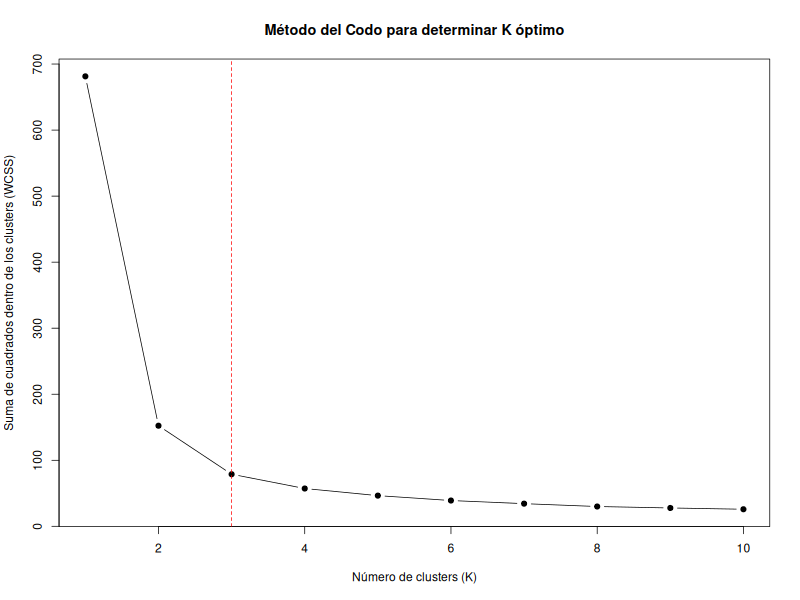

In [7]:
# Metodo del codo para determinar el número óptimo de clusters
wcss <- numeric() # Inicializamos un vector para almacenar la suma de cuadrados dentro de los
# clusters (WCSS) para diferentes valores de K
for (k in 1:10) {
  kmeans_model <- kmeans(iris[, -5], centers = k, nstart  = 20) # Ajustamos el modelo K-means para cada valor de K
  wcss[k] <- kmeans_model$tot.withinss # Almacenamos la WCSS para el valor actual de K en un vector que luego graficaremos
}
# Graficamos el método del codo
plot(1:10, wcss, type = "b", pch = 19, 
     xlab = "Número de clusters (K)", 
     ylab = "Suma de cuadrados dentro de los clusters (WCSS)", 
     main = "Método del Codo para determinar K óptimo")
abline(v = 3, col = "red", lty = 2) # Línea vertical en K=3, que es el valor óptimo identificado (lo conocemos de antemano)

Por último, para completar el análisis, podemos utilizar el método de la silueta para evaluar la calidad del clustering obtenido con K-means, usando el gráfico de silueta.

Valor promedio de silueta para K=3: 0.552819 


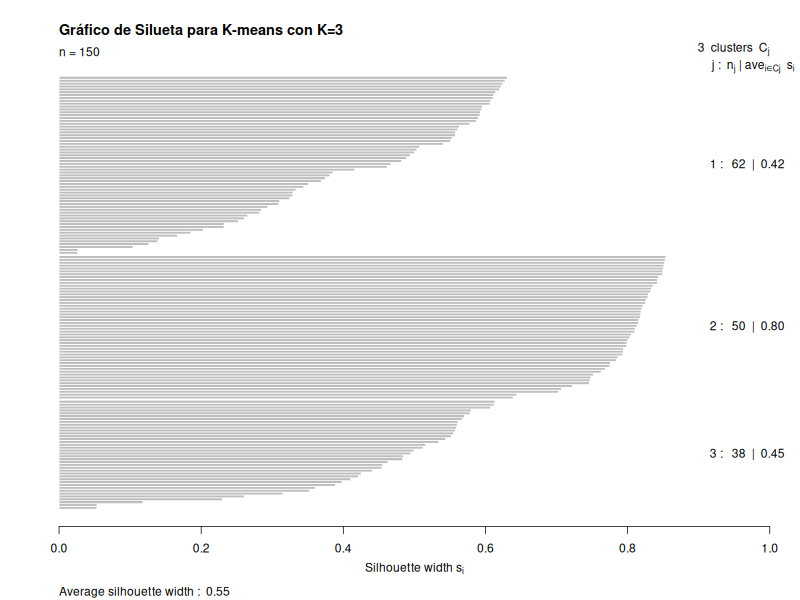

In [8]:
# Grafico de silueta para evaluar la calidad del clustering
library(cluster) # Carga el paquete cluster para funciones de análisis de clusters
k <- 3 # Número de clusters
kmeans_model <- kmeans(iris[, -5], centers = k, nstart = 20) # Ajuste del modelo K-means con K=3
silhouette_values <- silhouette(kmeans_model$cluster, dist(iris[, -5])) # Cálculo de los valores de silueta
plot(silhouette_values, main = "Gráfico de Silueta para K-means con K=3") # Gráfico de silueta
mean_silhouette <- mean(silhouette_values[, 3]) # Cálculo del valor promedio de silueta
cat("Valor promedio de silueta para K=3:", mean_silhouette, "\n") # Muestra el valor promedio de silueta



A continuación, usaremos la librería 'ggplot2' para visualizar los resultados del método del codo y del gráfico de silueta.

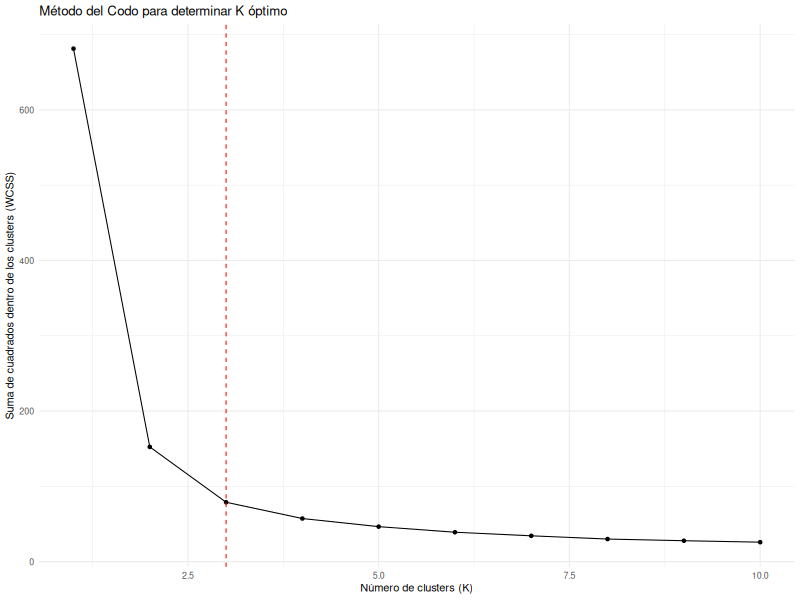

In [9]:
# Visualización del método del codo con ggplot2
library(ggplot2) # Carga la librería ggplot2 para visualización
wcss_df <- data.frame(K = 1:10, WCSS = wcss)
ggplot(wcss_df, aes(x = K, y = WCSS)) +
  geom_point() +
  geom_line() +
  geom_vline(xintercept = 3, linetype = "dashed", color = "red") +
  labs(title = "Método del Codo para determinar K óptimo",
       x = "Número de clusters (K)",
       y = "Suma de cuadrados dentro de los clusters (WCSS)") +
  theme_minimal()

**Visualización del gráfico de silueta con `factoextra`**

A continuación, se utiliza la librería `factoextra` para crear una visualización más atractiva del gráfico de silueta. Se realizan varias configuraciones para mejorar la apariencia del gráfico, como cambiar colores, ajustar etiquetas y modificar el tema.

  cluster size ave.sil.width
1       1   62          0.42
2       2   50          0.80
3       3   38          0.45
Valor promedio de silueta para K=3: 0.552819 


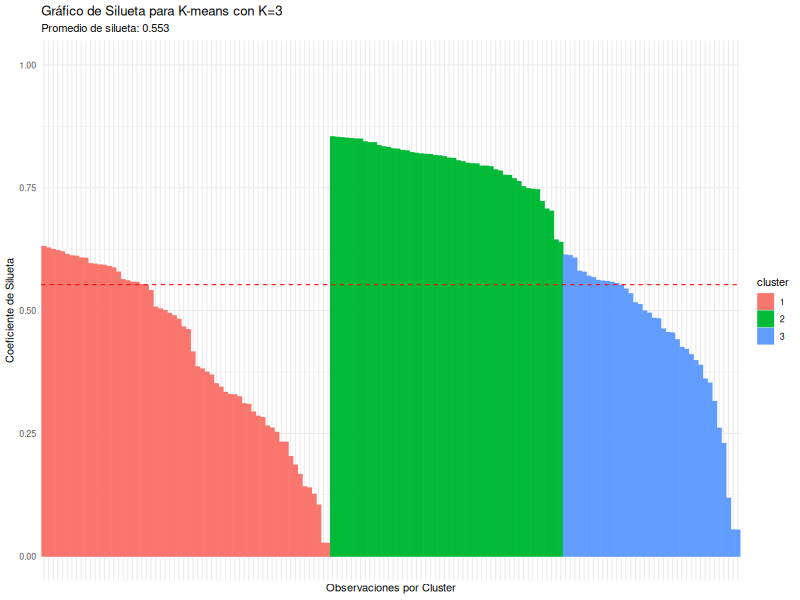

In [18]:
library(factoextra) # para instalar la librería: install.packages("factoextra")

# El parámetro label = FALSE quita los números correspondientes a cada observación en el gráfico de silueta
fviz_silhouette(silhouette_values, label = FALSE) +
  labs(title = "Gráfico de Silueta para K-means con K=3",
       subtitle = paste("Promedio de silueta:", round(mean(silhouette_values[, 3]), 3)),
       x = "Observaciones por Cluster", 
       y = "Coeficiente de Silueta") +
  theme_minimal() +
  theme(axis.text.x = element_blank()) # Doble seguridad para limpiar el eje X
cat("Valor promedio de silueta para K=3:", mean_silhouette, "\n") # Muestra el valor promedio de silueta

  cluster size ave.sil.width
1       1   62          0.42
2       2   50          0.80
3       3   38          0.45


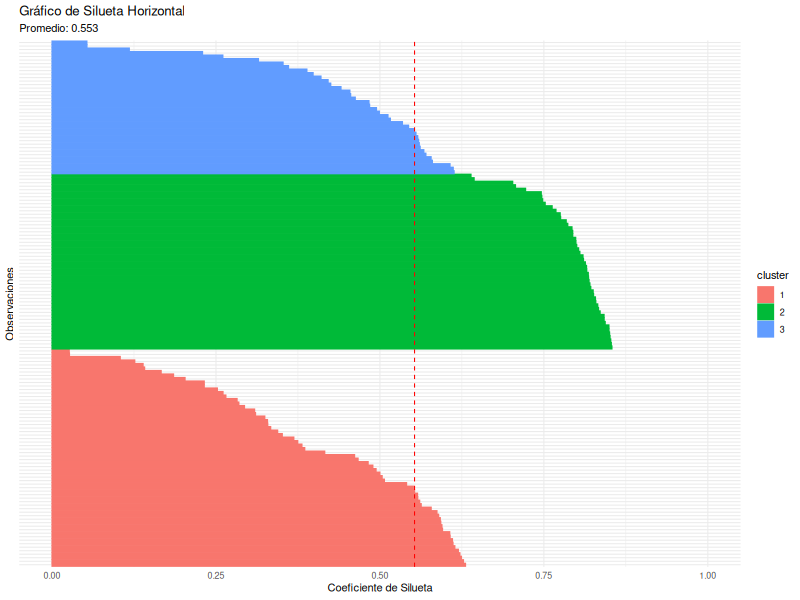

In [19]:
library(factoextra)

# Generamos el gráfico base con label = FALSE para evitar el desorden
fviz_silhouette(silhouette_values, label = FALSE) +
  # Giramos el gráfico: el eje X pasa a ser el vertical y el Y el horizontal
  coord_flip() +
  labs(title = "Gráfico de Silueta Horizontal",
       subtitle = paste("Promedio:", round(mean(silhouette_values[, 3]), 3)),
       x = "Observaciones", 
       y = "Coeficiente de Silueta") +
  theme_minimal() +
  # Al girar, ahora queremos limpiar el texto del eje Y (antes era el X)
  theme(axis.text.y = element_blank(),
        axis.ticks.y = element_blank())

  cluster size ave.sil.width
1       1   62          0.42
2       2   50          0.80
3       3   38          0.45


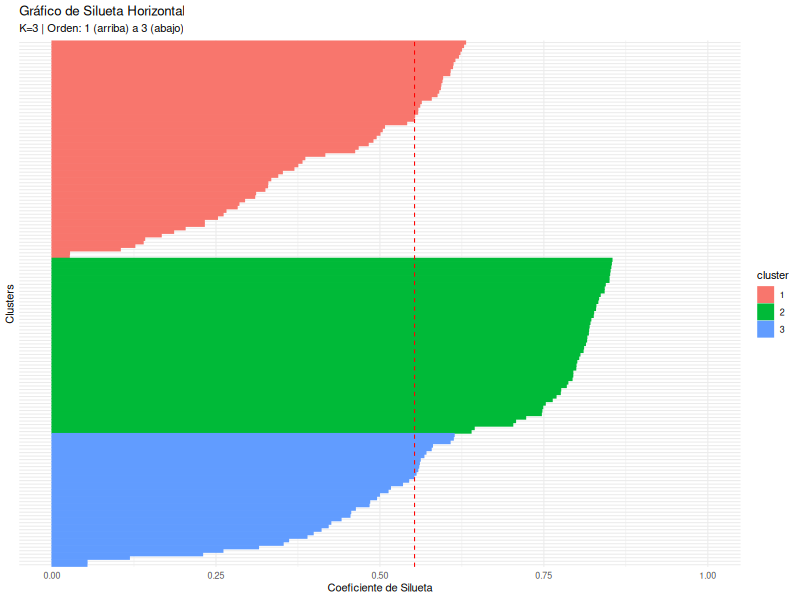

In [20]:
library(factoextra)

# Creamos el gráfico base
fviz_silhouette(silhouette_values, label = FALSE) +
  # 1. Giramos el gráfico a horizontal
  coord_flip() +
  # 2. Invertimos el eje X para que el Cluster 1 quede arriba y el 3 abajo
  scale_x_discrete(limits = rev) +
  labs(title = "Gráfico de Silueta Horizontal",
       subtitle = paste("K=3 | Orden: 1 (arriba) a 3 (abajo)"),
       x = "Clusters", 
       y = "Coeficiente de Silueta") +
  theme_minimal() +
  # 3. Limpiamos las etiquetas del eje que ahora es vertical (las observaciones)
  theme(axis.text.y = element_blank(),
        axis.ticks.y = element_blank())